In [1]:
# Exercise: 6-2
# Using any of the three classifiers described in this chapter, and any features you can think of,
# build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets:
# 500 words for the test set, 500 words for the dev-test set, and the remaining 6,900 words for the training set.
# Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to
# check your progress. Once you are satisfied with your classifier, check its final performance on the test set.
# How does the performance on the test set compare to the performance on the dev-test set? Is this what you’d expect?

def gender_features(word):
    return {'last_letter': word[-1]}

In [2]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [3]:
import nltk

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.372
             2          -0.37315        0.762
             3          -0.37282        0.762
             4          -0.37262        0.762
             5          -0.37249        0.762
             6          -0.37240        0.762
             7          -0.37233        0.762
             8          -0.37227        0.762
             9          -0.37223        0.762
            10          -0.37219        0.762
            11          -0.37216        0.762
            12          -0.37213        0.762
            13          -0.37211        0.762
            14          -0.37209        0.762
            15          -0.37208        0.762
            16          -0.37206        0.762
            17          -0.37205        0.762
            18          -0.37204        0.762
            19          -0.37203        0.762
  

In [4]:
print(nltk.classify.accuracy(classifier, devtest_set))

0.78


In [5]:
devtest_names = labeled_names[500:1000]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

In [6]:
for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Alisun                        
correct = female   guess = male     name = Amber                         
correct = female   guess = male     name = Avis                          
correct = female   guess = male     name = Beitris                       
correct = female   guess = male     name = Bird                          
correct = female   guess = male     name = Carmon                        
correct = female   guess = male     name = Charmain                      
correct = female   guess = male     name = Consuelo                      
correct = female   guess = male     name = Corabel                       
correct = female   guess = male     name = Darb                          
correct = female   guess = male     name = Daryn                         
correct = female   guess = male     name = Doris                         
correct = female   guess = male     name = Edin                          
correct = female   guess = male     na

In [7]:
def gender_features(word):
    return {'last_letter': word[-1],
            'length'     : len(word)}

In [8]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.372
             2          -0.44693        0.752
             3          -0.40265        0.771
             4          -0.38591        0.765
             5          -0.37848        0.764
             6          -0.37489        0.764
             7          -0.37305        0.760
             8          -0.37207        0.760
             9          -0.37152        0.760
            10          -0.37119        0.760
            11          -0.37098        0.760
            12          -0.37084        0.760
            13          -0.37074        0.760
            14          -0.37067        0.760
            15          -0.37061        0.760
            16          -0.37057        0.760
            17          -0.37053        0.760
            18          -0.37050        0.760
            19          -0.37047        0.760
  

In [9]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Alisun                        
correct = female   guess = male     name = Amber                         
correct = female   guess = male     name = Avis                          
correct = female   guess = male     name = Beitris                       
correct = female   guess = male     name = Bird                          
correct = female   guess = male     name = Carmon                        
correct = female   guess = male     name = Charmain                      
correct = female   guess = male     name = Consuelo                      
correct = female   guess = male     name = Darb                          
correct = female   guess = male     name = Daryn                         
correct = female   guess = male     name = Doris                         
correct = female   guess = male     name = Edin                          
correct = female   guess = male     name = Ellen                         
correct = female   guess = male     na

In [10]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word))
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}

In [11]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.372
             2          -0.47588        0.751
             3          -0.40714        0.810
             4          -0.36900        0.817
             5          -0.34555        0.821
             6          -0.32987        0.822
             7          -0.31869        0.824
             8          -0.31035        0.826
             9          -0.30389        0.829
            10          -0.29874        0.832
            11          -0.29454        0.833
            12          -0.29104        0.833
            13          -0.28809        0.834
            14          -0.28555        0.834
            15          -0.28336        0.834
            16          -0.28143        0.834
            17          -0.27972        0.834
            18          -0.27820        0.835
            19          -0.27683        0.835
  

In [12]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Aleece                        
correct = female   guess = male     name = Alisun                        
correct = female   guess = male     name = Amber                         
correct = female   guess = male     name = Ange                          
correct = female   guess = male     name = Bird                          
correct = female   guess = male     name = Carmon                        
correct = female   guess = male     name = Consuelo                      
correct = female   guess = male     name = Edin                          
correct = female   guess = male     name = Fleur                         
correct = female   guess = male     name = Gabey                         
correct = female   guess = male     name = Gaby                          
correct = female   guess = male     name = George                        
correct = female   guess = male     name = Ginnifer                      
correct = female   guess = male     na

In [13]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'number_vowels': sum([1 for ch in word if ch in 'AEIOUaeiouy']),
            'first_vowel'  : [i for i in range(len(word))
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}

In [14]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.372
             2          -0.48503        0.734
             3          -0.41697        0.805
             4          -0.37785        0.816
             5          -0.35326        0.820
             6          -0.33655        0.822
             7          -0.32452        0.823
             8          -0.31546        0.826
             9          -0.30840        0.828
            10          -0.30273        0.830
            11          -0.29808        0.832
            12          -0.29420        0.831
            13          -0.29090        0.832
            14          -0.28806        0.832
            15          -0.28559        0.834
            16          -0.28342        0.835
            17          -0.28149        0.836
            18          -0.27977        0.836
            19          -0.27822        0.836
  

In [15]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Alisun                        
correct = female   guess = male     name = Amber                         
correct = female   guess = male     name = Ange                          
correct = female   guess = male     name = Avis                          
correct = female   guess = male     name = Bird                          
correct = female   guess = male     name = Carmon                        
correct = female   guess = male     name = Constance                     
correct = female   guess = male     name = Consuelo                      
correct = female   guess = male     name = Edin                          
correct = female   guess = male     name = Fleur                         
correct = female   guess = male     name = Gabey                         
correct = female   guess = male     name = Gaby                          
correct = female   guess = male     name = Ginnifer                      
correct = female   guess = male     na

In [16]:
print(nltk.classify.accuracy(classifier, test_set))

0.816


In [17]:
# Exercise: 6-2
# The Senseval 2 Corpus contains data intended to train word-sense disambiguation classifiers. It contains data
# for four words: hard, interest, line, and serve. Choose one of these four words, and load the corresponding data:
# >>> from nltk.corpus import senseval
# >>> instances = senseval.instances('hard.pos')
# >>> size = int(len(instances) * 0.1)
# >>> train_set, test_set = instances[size:], instances[:size]
# Using this dataset, build a classifier that predicts the correct sense tag for a given instance. See the corpus
# HOWTO at http://www.nltk.org/howto for information on using the instance objects returned by the Senseval 2 Corpus.

from nltk.corpus import senseval
instances = senseval.instances('hard.pos')
size = int(len(instances) * 0.1)
train_set, test_set = instances[size:], instances[:size]

In [18]:
%matplotlib inline
senses = [instances[i].senses[0][4] for i in range(len(instances))]

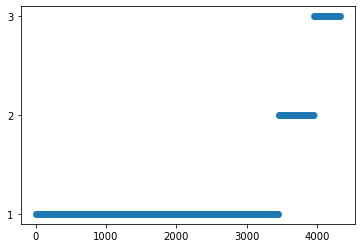

In [19]:
import matplotlib.pyplot as plt

plt.scatter(range(len(instances)), senses, alpha = 0.1)
plt.show()

In [20]:
import random

instances = list(instances)
random.shuffle(instances)

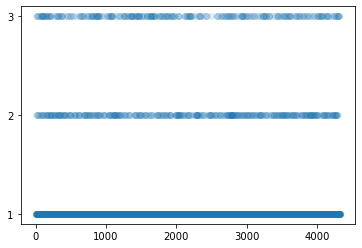

In [21]:
senses = [int(instances[i].senses[0][4]) for i in range(len(instances))]

plt.scatter(range(len(instances)), senses, alpha = 0.1)
plt.yticks([1, 2, 3])
plt.show()

In [22]:
def hard_features(inst):
    p = inst.position
    return {'left2':  inst.context[p - 2],
            'left1':  inst.context[p - 1],
            'right':  inst.context[p + 1]}

In [23]:
featuresets = [(hard_features(n), n.senses) for n in instances]
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [24]:
nltk.classify.accuracy(classifier, test_set)

0.8937644341801386

In [25]:
classifier.classify(hard_features(instances[0]))

('HARD1',)

In [26]:
instances[0]

SensevalInstance(word='hard-a', position=4, context=[('``', '``'), ('i', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('hard', 'JJ'), ('time', 'NN'), ('understanding', 'NN'), ('how', 'WRB'), ('you', 'PRP'), ('can', 'MD'), ('signal', 'VB'), ('before', 'IN'), ('you', 'PRP'), ('get', 'VBP'), ('to', 'TO'), ('the', 'DT'), ('bottom', 'NN'), ('of', 'IN'), ('the', 'DT'), ('pile', 'NN'), ('.', '.'), ("''", "''")], senses=('HARD1',))

In [27]:
# Exercise: 6-4
# Using the movie review document classifier discussed in this chapter, generate a list of the 30 features that
# the classifier finds to be most informative. Can you explain why these particular features are informative?
# Do you find any of them surprising?

from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [28]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [29]:
featuresets = [(document_features(d), c) for (d, c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [30]:
classifier.show_most_informative_features(30)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.2 : 1.0
         contains(mulan) = True              pos : neg    =      8.9 : 1.0
        contains(seagal) = True              neg : pos    =      8.3 : 1.0
         contains(damon) = True              pos : neg    =      7.8 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.6 : 1.0
        contains(wasted) = True              neg : pos    =      6.2 : 1.0
          contains(lame) = True              neg : pos    =      5.6 : 1.0
         contains(flynt) = True              pos : neg    =      5.6 : 1.0
         contains(waste) = True              neg : pos    =      5.3 : 1.0
        contains(poorly) = True              neg : pos    =      5.3 : 1.0
         contains(awful) = True              neg : pos    =      5.1 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.0 : 1.0
           contains(era) = True              pos : neg    =      4.3 : 1.0

In [31]:
# Exercise: 6-5
# Select one of the classification tasks described in this chapter, such as name gender detection, document
# classification, part-of-speech tagging, or dialogue act classification. Using the same training and test data,
# and the same feature extractor, build three classifiers for the task: a decision tree, a naive Bayes classifier,
# and a Maximum Entropy classifier. Compare the performance of the three classifiers on your selected task. How do
# you think that your results might be different if you used a different feature extractor?

def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'number_vowels': sum([1 for ch in word if ch in 'AEIOUaeiouy']),
            'first_vowel'  : [i for i in range(len(word))
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}

In [32]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [33]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.371
             2          -0.48311        0.728
             3          -0.41637        0.806
             4          -0.37818        0.814
             5          -0.35418        0.820
             6          -0.33786        0.823
             7          -0.32609        0.823
             8          -0.31719        0.825
             9          -0.31023        0.828
            10          -0.30464        0.829
            11          -0.30003        0.829
            12          -0.29618        0.831
            13          -0.29289        0.832
            14          -0.29006        0.832
            15          -0.28758        0.834
            16          -0.28540        0.834
            17          -0.28346        0.835
            18          -0.28172        0.836
            19          -0.28015        0.836
  

In [34]:
classifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.742

In [35]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.792

In [36]:
def gender_features(word):
    return {'last_letter'  : word[-1]}

In [37]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [38]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.370
             2          -0.37513        0.761
             3          -0.37473        0.761
             4          -0.37449        0.761
             5          -0.37433        0.761
             6          -0.37422        0.761
             7          -0.37413        0.761
             8          -0.37406        0.761
             9          -0.37401        0.761
            10          -0.37397        0.761
            11          -0.37393        0.761
            12          -0.37390        0.761
            13          -0.37387        0.761
            14          -0.37385        0.761
            15          -0.37383        0.761
            16          -0.37381        0.761
            17          -0.37380        0.761
            18          -0.37378        0.761
            19          -0.37377        0.761
  

In [39]:
classifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.766

In [40]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.764

In [41]:
# Exercise: 6-6
# The synonyms strong and powerful pattern differently (try combining them with chip and sales). What features are
# relevant in this distinction? Build a classifier that predicts when each word should be used.

from nltk.corpus import brown

text = nltk.Text([w for s in brown.sents() for w in s])

In [42]:
text.concordance('strong')

Displaying 25 of 202 matches:
n . Georgia Republicans are getting strong encouragement to enter a candidate 
industry by Southern states , and a strong fight against discrimination in bus
cit on where I stand to bring you a strong , dynamic administration . I'm not 
using bill is expected to encounter strong opposition by the coalition of Sout
p with some good stops and showed a strong arm at third base . Bingles and bob
 aerials . Skorich , however , is a strong advocate of a balanced attack -- sp
and swept all championships . Carol Strong , 13 , of Cedar Mill cooked the cha
emain are those that were headed by strong executives , men with the abilities
s the only antidote -- a Biblically strong Christianity . So the Christian You
 control machinery . In the U. S. , strong pressures have been building up for
 the forthcoming encounter produced strong reactions in the U. S. of both appr
, Player said later , `` and I felt strong . When you're playing like that you
s and good nature and 

In [43]:
text.concordance('powerful')

Displaying 25 of 63 matches:
 . Cincinnati , Ohio ( AP ) -- The powerful New York Yankees won their 19th wo
ecrets off to Moscow , either on a powerful transmitter buried under the kitch
gerous precedent '' ! ! Cannon , a powerful , conservative man , brought welco
ker of the House , and second most powerful man in Washington . Mr. Rayburn wa
d . But these are side issues to a powerful central theme . That theme cuts th
 world is dominated by two large , powerful nations armed with murderous nucle
sively in his footsteps . When one powerful nation strives to emulate the succ
, because it provides a direct and powerful mirror in which the Negro can hear
( the charge-excess ) are far more powerful than gravitation , the surface hyd
world in balanced harmony around a powerful central axis . The tremendous emph
. But such a reaction obscures the powerful efforts made in the past by both N
ch a decision should have placed a powerful weapon in the hands of the entire 
, imagine that you can 

In [44]:
bts = brown.tagged_sents()
strong = [s for s in bts for t in s if 'strong' in t]

for s in strong:
    for i in range(len(s)):
        if s[i][0] == 'strong':
            s[i] = '_____'

In [45]:
labeled_strong = [(s, 'strong') for s in strong]
powerful = [s for s in bts for t in s if 'powerful' in t]
for s in powerful:
    for i in range(len(s)):
        if s[i][0] == 'powerful':
            s[i] = '_____'
labeled_powerful = [(s, 'powerful') for s in powerful]

In [46]:
labeled_powerful[0]

([('--', '--'),
  ('The', 'AT'),
  '_____',
  ('New', 'JJ-TL'),
  ('York', 'NP-TL'),
  ('Yankees', 'NPS-TL'),
  ('won', 'VBD'),
  ('their', 'PP$'),
  ('19th', 'OD'),
  ('world', 'NN'),
  ('series', 'NN'),
  ('in', 'IN'),
  ('a', 'AT'),
  ('5-game', 'JJ'),
  ('romp', 'NN'),
  ('over', 'IN'),
  ('outclassed', 'VBN'),
  ('Cincinnati', 'NP'),
  (',', ','),
  ('crushing', 'VBG'),
  ('the', 'AT'),
  ('Reds', 'NNS-TL'),
  ('in', 'IN'),
  ('a', 'AT'),
  ('humiliating', 'JJ'),
  ('13-5', 'CD'),
  ('barrage', 'NN'),
  ('Monday', 'NR'),
  ('in', 'IN'),
  ('the', 'AT'),
  ('loosely', 'RB'),
  ('played', 'VBN'),
  ('finale', 'NN'),
  ('.', '.')],
 'powerful')

In [47]:
def adj_features(sent):
    p = sent.index('_____')
    if p >= 2:
        left2 = sent[p - 2][0]
    else:
        left2 = (None, None)
    if p >= 1:
        left1 = sent[p - 1][0]
    else:
        left1 = (None, None)
    return {'left2':  left2,
            'left1':  left1,
            'right':  sent[p + 1][0]}

In [48]:
adj_features(labeled_powerful[0][0])

{'left2': '--', 'left1': 'The', 'right': 'New'}

In [49]:
labeled_sents = (labeled_strong + labeled_powerful)
random.shuffle(labeled_sents)

In [50]:
featuresets = [(adj_features(s), adj) for (s, adj) in labeled_sents]
test_set, train_set = featuresets[:25], featuresets[25:]
classifier = nltk.classify.DecisionTreeClassifier.train(train_set)

In [51]:
nltk.classify.accuracy(classifier, test_set)

0.76

In [52]:
vocab = [1000, 2000, 3000, 4000, 5000]
perfs = []

for v in vocab:
    all_words = nltk.FreqDist(w.lower() for w in brown.words())
    word_features = [w for w, _ in all_words.most_common(v)]

    def sent_features(sent):
        sent_words = set([t[0] for t in sent])
        features = {}
        for word in word_features:
            features['contains({})'.format(word)] = (word in sent_words)
        return features

    featuresets = [(sent_features(n), adj) for (n, adj) in labeled_sents]
    test_set, train_set = featuresets[:25], featuresets[25:]
    classifier = nltk.classify.NaiveBayesClassifier.train(train_set)

    perfs.append(nltk.classify.accuracy(classifier, test_set))

In [53]:
perfs

[0.8, 0.76, 0.72, 0.68, 0.68]

In [54]:
# Exercise: 6-7
# The dialogue act classifier assigns labels to individual posts, without considering the context in which the
# post is found. However, dialogue acts are highly dependent on context, and some sequences of dialogue act are
# much more likely than others. For example, a ynQuestion dialogue act is much more likely to be answered by a
# yanswer than by a greeting. Make use of this fact to build a consecutive classifier for labeling dialogue acts.
# Be sure to consider what features might be useful. See the code for the consecutive classifier for part-of-speech
# tags in Example 6-5 to get some ideas.

post = nltk.corpus.nps_chat.xml_posts()
for i in range(20):
    print(post[i].text, post[i].get('class'))

now im left with this gay name Statement
:P Emotion
PART System
hey everyone   Greet
ah well Statement
NICK :10-19-20sUser7 System
10-19-20sUser7 is a gay name. Accept
.ACTION gives 10-19-20sUser121 a golf clap. System
:) Emotion
JOIN System
hi 10-19-20sUser59 Greet
26/ m/ ky women that are nice please pm me Statement
JOIN System
PART System
there ya go 10-19-20sUser7 Statement
don't golf clap me. Reject
fuck you 10-19-20sUser121:@ Reject
whats everyone up to? whQuestion
PART System
PART System


In [55]:
post_words = [w.lower() for i in range(len(post))
              for w in post[i].text.split()]
fd = nltk.FreqDist(post_words)
word_features = [w for (w, _) in fd.most_common(2000)]

In [56]:
def dialog_features(post, i):
    post_words = set(post[i].text.split())
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in post_words)
    if i == 0:
        features["prev-class"] = "<START>"
    else:
        features["prev-class"] = post[i - 1].get('class')
    return features

In [57]:
set(post[0].text.split())

{'gay', 'im', 'left', 'name', 'now', 'this', 'with'}

In [58]:
featuresets = []
for i in range(len(post)):
    featuresets.append( (dialog_features(post, i), post[i].get('class') ) )

In [59]:
size = int(len(featuresets) * 0.9)
train_set, test_set = featuresets[:size], featuresets[size:]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [60]:
classes = set([c for (_, c) in featuresets])
len(classes)

15

In [61]:
print(classes, end = '')

{'Emphasis', 'Reject', 'nAnswer', 'Accept', 'yAnswer', 'Bye', 'Continuer', 'Clarify', 'Emotion', 'Other', 'Greet', 'ynQuestion', 'whQuestion', 'Statement', 'System'}

In [62]:
nltk.classify.accuracy(classifier, test_set)

0.674550614947966

In [63]:
# Exercise: 5-8
# Word features can be very useful for performing document classification, since the words that appear in a
# document give a strong indication about what its semantic content is. However, many words occur very infrequently,
# and some of the most informative words in a document may never have occurred in our training data. One solution is
# to make use of a lexicon, which describes how different words relate to one another. Using the WordNet lexicon,
# augment the movie review document classifier presented in this chapter to use features that generalize the words
# that appear in a document, making it more likely that they will match words found in the training data.

from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [64]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = [w for (w, _) in all_words.most_common(2000)]

In [65]:
from nltk.corpus import wordnet as wn

def document_features(document):
    document_words = set(document)
    features = {}
    for word in document_words:
        # if word amongst most common words,
        # report that this word is in the document,
        # otherwise, get wordnet synset
        if word in word_features:
            features['contains({})'.format(word)] = True
        else:
            ws = wn.synsets(word) # not bothering with POS
            if ws != []:
                features['{}'.format(ws[0])] = True
    return features

In [66]:
featuresets = [(document_features(d), c) for (d, c) in documents]

In [67]:
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [68]:
nltk.classify.accuracy(classifier, test_set)

0.73

In [69]:
classifier.show_most_informative_features(30)

Most Informative Features
   Synset('feeble.s.01') = True              neg : pos    =     11.1 : 1.0
   contains(outstanding) = True              pos : neg    =     10.7 : 1.0
Synset('atrocious.s.01') = True              neg : pos    =     10.4 : 1.0
   Synset('hudson.n.01') = True              neg : pos    =     10.4 : 1.0
 Synset('seamless.a.01') = True              pos : neg    =     10.2 : 1.0
   Synset('symbol.n.01') = True              pos : neg    =     10.1 : 1.0
Synset('agonizingly.r.01') = True              neg : pos    =      9.8 : 1.0
Synset('incoherent.a.01') = True              neg : pos    =      9.8 : 1.0
Synset('odds_and_ends.n.01') = True              neg : pos    =      9.8 : 1.0
   Synset('annual.n.01') = True              pos : neg    =      9.6 : 1.0
     Synset('deft.s.01') = True              pos : neg    =      9.6 : 1.0
 Synset('thematic.a.01') = True              pos : neg    =      9.6 : 1.0
Synset('crackbrained.s.01') = True              neg : pos    =     

In [70]:
wn.synset('damon.n.01').definition()

'the friend of Phintias who pledged his life that Phintias would return (4th century BC)'

In [71]:
vocab = [500, 1000, 1500, 2000, 2500, 3000]
perfs = []

for v in vocab:


    all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
    word_features = [w for (w, _) in all_words.most_common(v)]

    from nltk.corpus import wordnet as wn

    def document_features(document):
        document_words = set(document)
        features = {}
        for word in document_words:
            if word in word_features:
                features['contains({})'.format(word)] = True
            else:
                ws = wn.synsets(word)
                if ws != []:
                    features['{}'.format(ws[0])] = True
        return features


    featuresets = [(document_features(d), c) for (d, c) in documents]


    train_set, test_set = featuresets[100:], featuresets[:100]
    classifier = nltk.NaiveBayesClassifier.train(train_set)

    perfs.append(nltk.classify.accuracy(classifier, test_set))

In [72]:
perfs

[0.73, 0.73, 0.74, 0.73, 0.75, 0.73]

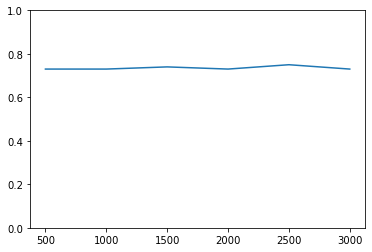

In [73]:
import matplotlib.pyplot as plt

plt.plot(vocab, perfs)
plt.ylim(0, 1.0)
plt.show()

In [74]:
# Exercise: 6-9
# The PP Attachment Corpus is a corpus describing prepositional phrase attachment decisions. Each instance in the
# corpus is encoded as a PPAttachment object:
# >>> from nltk.corpus import ppattach
# >>> ppattach.attachments('training')
# [PPAttachment(sent='0', verb='join', noun1='board',
#               prep='as', noun2='director', attachment='V'),
#  PPAttachment(sent='1', verb='is', noun1='chairman',
#               prep='of', noun2='N.V.', attachment='N'),
#  ...]
# >>> inst = ppattach.attachments('training')[1]
# >>> (inst.noun1, inst.prep, inst.noun2)
# ('chairman', 'of', 'N.V.')
# Select only the instances where inst.attachment is N:
# >>> nattach = [inst for inst in ppattach.attachments('training')
# ...            if inst.attachment == 'N']
# Using this subcorpus, build a classifier that attempts to predict which preposition is used to connect a
# given pair of nouns. For example, given the pair of nouns team and researchers, the classifier should
# predict the preposition of. See the corpus HOWTO at http://www.nltk.org/howto for more information on
# using the PP Attachment Corpus.

from nltk.corpus import ppattach
ppattach.attachments('training')

[PPAttachment(sent='0', verb='join', noun1='board', prep='as', noun2='director', attachment='V'), PPAttachment(sent='1', verb='is', noun1='chairman', prep='of', noun2='N.V.', attachment='N'), ...]

In [75]:
inst = ppattach.attachments('training')[1]
(inst.noun1, inst.prep, inst.noun2)

('chairman', 'of', 'N.V.')

In [76]:
nattach = [inst for inst in ppattach.attachments('training')
           if inst.attachment == 'N']
nattach[:5]

[PPAttachment(sent='1', verb='is', noun1='chairman', prep='of', noun2='N.V.', attachment='N'),
 PPAttachment(sent='2', verb='named', noun1='director', prep='of', noun2='conglomerate', attachment='N'),
 PPAttachment(sent='3', verb='caused', noun1='percentage', prep='of', noun2='deaths', attachment='N'),
 PPAttachment(sent='9', verb='is', noun1='asbestos', prep='in', noun2='products', attachment='N'),
 PPAttachment(sent='12', verb='led', noun1='team', prep='of', noun2='researchers', attachment='N')]

In [77]:
def prep_features(inst):
    features = {'noun1': inst.noun1}
    return features

prep_features(nattach[0])

{'noun1': 'chairman'}

In [78]:
featuresets = [(prep_features(inst), inst.prep) for inst in nattach]

size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

In [79]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [80]:
nltk.classify.accuracy(classifier, test_set)

0.647329650092081

In [81]:
preps = [p for (_, p) in featuresets]
len(set(preps))

59

In [82]:
fd = nltk.FreqDist(preps)

In [83]:
fd['of']/len(preps)

0.508697653014266

In [84]:
# Exercise: 6-10
# Suppose you wanted to automatically generate a prose description of a scene, and already had a word to uniquely
# describe each entity, such as the book, and simply wanted to decide whether to use in or on in relating various
# items, e.g., the book is in the cupboard versus the book is on the shelf. Explore this issue by looking at
# corpus data and writing programs as needed. Consider the following examples:
# 1. in the car versus on the train
# 2. in town versus on campus
# 3. in the picture versus on the screen
# 4. in Macbeth versus on Letterman

from nltk.corpus import brown
bts = brown.tagged_sents()

In [85]:
def find_sents(corpus, *words):
    """
    Returns from a tagged corpus sentences that
    contain a phrase.  Words in the phrase must be
    in the same order as listed in the arguments.

    Arguments:
    corpus: Tagged corpus.
    *words: Words in the phrase to be matched.  Words
            must be in the order in which they are to be found.
    """

    sents = []
    lw = len(words)
    for s in corpus:
        flag = False
        for i in range(len(s) - lw):
            for j in range(lw):
                if s[i + j][0] == words[j]:
                    flag = True
                else:
                    flag = False
                    break
            if flag:
                sents.append(s)
    return sents

In [86]:
car = find_sents(bts, "in", "the", "car")
train = find_sents(bts, "on", "the", "train")
town = find_sents(bts, "in", "town")
campus = find_sents(bts, "on", "campus")
picture = find_sents(bts, "in", "the", "picture")
screen = find_sents(bts, "on", "the", "screen")
Macbeth = find_sents(bts, "in", "Macbeth")
Letterman = find_sents(bts, "on", "Letterman")

In [87]:
sets = [car, train, town, campus, picture, screen, Macbeth, Letterman]
for s in sets:
    print(len(s))

9
8
21
1
5
6
1
0
